# Consomation des moteurs

## Etape 3. Modélisation phase de vol par phases de vol. 

In [27]:
import os
from glob import glob
import numpy as np
import pandas as pd
import statsmodels.api as sm
import tabata as tbt
from tabata import Opset
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [28]:
datadir = "../data/"
df = pd.read_hdf(os.path.join(datadir,"out","Results.h5"),"phase_table")

In [91]:
phase_list = df["Phase"].unique()
for phase in phase_list[0:]:
    dfp = df[df["Phase"]==phase].drop(columns=["Phase"])
    break
print(phase)

climb


In [92]:
indep = []
inutile = ['AC', 'ENG', 'Flight', 'Weight [Kg]', 'Leg [h]', 'Volume [l]']
while len(inutile)>0:
    indep += inutile
    linmod = sm.OLS(dfp["Volume [l]"],)dfp.drop(columns=indep).fit()
    inutile = list(linmod.pvalues[linmod.pvalues>0.05].index)
print(linmod.summary())

                                 OLS Regression Results                                
Dep. Variable:             Volume [l]   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.286e+06
Date:                Thu, 29 Feb 2024   Prob (F-statistic):                        0.00
Time:                        15:41:47   Log-Likelihood:                         -26091.
No. Observations:                5982   AIC:                                  5.220e+04
Df Residuals:                    5973   BIC:                                  5.226e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

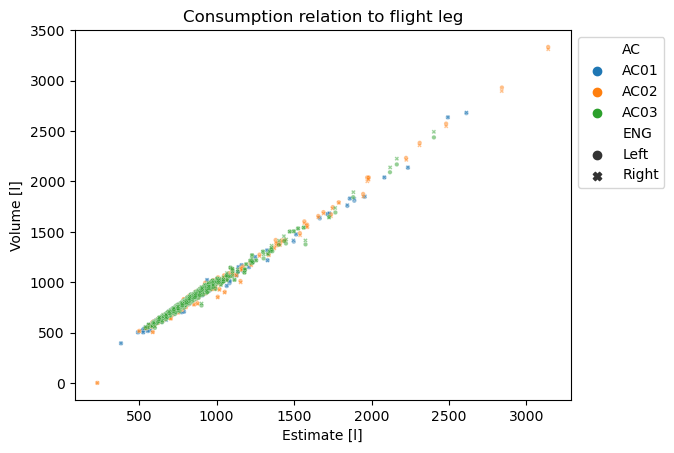

In [105]:
dfpr = dfp.copy()
dfpr["Estimate [l]"] = linmod.predict(dfp.drop(columns=indep))


import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
ax = sns.scatterplot(data=dfpr,x="Estimate [l]", y="Volume [l]", 
                     hue="AC", style="ENG", s=10, alpha=0.5)
ax.set(title="Consumption relation to flight leg")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [93]:
linmod.resid

0        2.031921
1        2.800369
2        6.234971
3        2.012619
4       11.945784
          ...    
1993    15.758011
1994   -10.345980
1995     9.999625
1996     4.294689
1997    18.112086
Length: 5982, dtype: float64

In [44]:
dfp["Volume [l]"]-linmod.predict()

0        -9.028805
1       -11.438811
2        -8.556001
3        -6.489621
4         7.705697
           ...    
1993     16.604691
1994   -110.544111
1995    -84.442532
1996    -15.965990
1997     -3.413262
Name: Volume [l], Length: 5982, dtype: float64

In [45]:
df

,AC,ENG,Flight,Phase,Weight [Kg],Leg [h],T_oil_init [C],Duration [h],Alt_max [ft],Mach_max,Slope [ft/s],Egt_mean [C],TAT_max [C],TAT_min [C],T_oil_range [C],TLA [#],NAIV [s],Volume [l]
0,AC01,Left,0,climb,3956.918246,2.063611,73.074434,0.276389,39439.264501,0.616248,37.642997,797.846132,28.110368,-18.379856,13.334751,50,0.000000,824.614809
1,AC01,Right,0,climb,3956.918246,2.063611,73.074434,0.276389,39439.264501,0.616248,37.642997,797.846132,28.110368,-18.379856,15.468311,49,0.000000,825.452162
2,AC01,Left,1,climb,4040.301713,2.071944,105.611225,0.287500,39457.811063,0.640898,36.044840,809.162879,40.543801,-11.622556,15.468311,10,0.000000,874.681045
3,AC01,Right,1,climb,4040.301713,2.071944,105.611225,0.287500,39457.811063,0.640898,36.044840,809.162879,40.543801,-11.622556,16.535091,9,0.000000,870.679693
4,AC01,Left,2,climb,3667.201361,1.956111,73.074434,0.311944,40825.620025,0.624464,34.549785,788.444108,25.948032,-21.353068,22.935771,65,0.000000,896.926225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,AC03,Right,999,descend,2690.535261,1.458611,55.472563,0.352222,37621.701406,0.583381,27.702830,495.593485,14.325476,-28.921244,16.001701,144,506.049591,278.170176
1994,AC03,Left,1000,descend,3404.696804,1.976944,55.472563,0.849167,36471.814551,0.632681,11.387601,509.650415,8.919636,-23.245112,16.001701,222,681.264939,803.358004
1995,AC03,Right,1000,descend,3404.696804,1.976944,55.472563,0.849167,36471.814551,0.632681,11.387601,509.650415,8.919636,-23.245112,16.535091,232,681.264939,831.856418
1996,AC03,Left,1001,descend,2680.301984,1.505000,48.538492,0.373889,37134.854149,0.591598,25.752990,483.587175,10.811680,-27.569784,16.535091,205,0.000000,278.907346


In [110]:
aI = 127.5581
aD = 1420.4358
dfr = df.copy()
acs = df.AC.unique()
phase_list = df["Phase"].unique()
for i, ac in enumerate(acs):
    df_train = df[df.AC != ac]
    df_test = df[df.AC == ac]
    #df_train = df_test
    for phase in phase_list:
        dfp_train = df_train[df_train["Phase"]==phase].drop(columns=["Phase"])
        dfp_test = df_test[df_test["Phase"]==phase].drop(columns=["Phase"])
        # Création du modèle par phase.
        indep = []
        inutile = ['AC', 'ENG', 'Flight', 'Weight [Kg]', 'Leg [h]', 'Volume [l]']
        while len(inutile)>0:
            indep += inutile
            linmod = sm.OLS(dfp_train["Volume [l]"],dfp_train.drop(columns=indep)).fit()
            inutile = list(linmod.pvalues[linmod.pvalues>0.05].index)
        print(f"{ac} {phase:7s} R2a={linmod.rsquared_adj}")
        dfr.loc[(df.AC == ac) & (df.Phase==phase),'Estimate [l]'] = linmod.predict(dfp_test.drop(columns=indep))
        dfr.loc[(df.AC == ac) & (df.Phase==phase),'Linear [l]'] = aI + aD*df_test.loc[df_test.Phase==phase,'Duration [h]']
        #dfr['Estimate [l]'] = linmod.predict(dfp_test.drop(columns=indep))
        #dfr['Linear [l]'] = aI + aD*df_test['Duration [h]']


AC01 climb   R2a=0.9994637511940884
AC01 cruise  R2a=0.9988094331488184
AC01 descend R2a=0.9938862224188071
AC02 climb   R2a=0.9995557129997891
AC02 cruise  R2a=0.9988800491355186
AC02 descend R2a=0.9936893639732434
AC03 climb   R2a=0.999471490049096
AC03 cruise  R2a=0.9988569926638308
AC03 descend R2a=0.9933537703405984


In [111]:
dfr

,AC,ENG,Flight,Phase,Weight [Kg],Leg [h],T_oil_init [C],Duration [h],Alt_max [ft],Mach_max,Slope [ft/s],Egt_mean [C],TAT_max [C],TAT_min [C],T_oil_range [C],TLA [#],NAIV [s],Volume [l],Estimate [l],Linear [l]
0,AC01,Left,0,climb,3956.918246,2.063611,73.074434,0.276389,39439.264501,0.616248,37.642997,797.846132,28.110368,-18.379856,13.334751,50,0.000000,824.614809,822.986923,520.150773
1,AC01,Right,0,climb,3956.918246,2.063611,73.074434,0.276389,39439.264501,0.616248,37.642997,797.846132,28.110368,-18.379856,15.468311,49,0.000000,825.452162,822.433044,520.150773
2,AC01,Left,1,climb,4040.301713,2.071944,105.611225,0.287500,39457.811063,0.640898,36.044840,809.162879,40.543801,-11.622556,15.468311,10,0.000000,874.681045,865.103079,535.933392
3,AC01,Right,1,climb,4040.301713,2.071944,105.611225,0.287500,39457.811063,0.640898,36.044840,809.162879,40.543801,-11.622556,16.535091,9,0.000000,870.679693,865.008175,535.933392
4,AC01,Left,2,climb,3667.201361,1.956111,73.074434,0.311944,40825.620025,0.624464,34.549785,788.444108,25.948032,-21.353068,22.935771,65,0.000000,896.926225,883.337033,570.655156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,AC03,Right,999,descend,2690.535261,1.458611,55.472563,0.352222,37621.701406,0.583381,27.702830,495.593485,14.325476,-28.921244,16.001701,144,506.049591,278.170176,259.398511,627.867154
1994,AC03,Left,1000,descend,3404.696804,1.976944,55.472563,0.849167,36471.814551,0.632681,11.387601,509.650415,8.919636,-23.245112,16.001701,222,681.264939,803.358004,915.030067,1333.744833
1995,AC03,Right,1000,descend,3404.696804,1.976944,55.472563,0.849167,36471.814551,0.632681,11.387601,509.650415,8.919636,-23.245112,16.535091,232,681.264939,831.856418,918.285020,1333.744833
1996,AC03,Left,1001,descend,2680.301984,1.505000,48.538492,0.373889,37134.854149,0.591598,25.752990,483.587175,10.811680,-27.569784,16.535091,205,0.000000,278.907346,296.938120,658.643263


In [116]:
dff = dfr[["AC","ENG","Flight","Phase","Duration [h]", "Volume [l]","Estimate [l]","Linear [l]"]]
dffs = dff.drop(columns=["Phase"]).groupby(["AC","ENG","Flight"]).sum()

In [117]:
dffs

Duration [h]   Volume [l]  Estimate [l]   Linear [l]
AC   ENG   Flight                                                      
AC01 Left  0           1.630556  2564.251641   2533.571580  2698.773785
           1           1.704444  2667.712591   2643.350459  2803.728208
           2           1.554167  2341.632363   2331.164355  2590.268272
           3           1.450833  2078.471741   2159.568602  2443.489906
           4           0.998611  1568.263560   1587.088787  1801.137273
...                         ...          ...           ...          ...
AC03 Right 997         1.826667  2747.140013   2626.431347  2977.337028
           998         1.666944  2483.846311   2392.641979  2750.461865
           999         1.139167  1739.100029   1705.814037  2000.787415
           1000        1.430000  2091.253337   2180.168076  2413.897494
           1001        1.116667  1696.161761   1670.368430  1968.827610

[5982 rows x 4 columns]

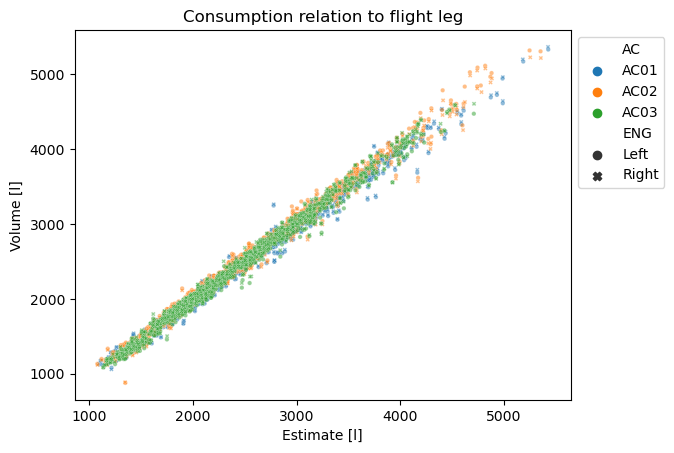

In [120]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
ax = sns.scatterplot(data=dffs,x="Estimate [l]", y="Volume [l]", 
                     hue="AC", style="ENG", s=10, alpha=0.5)
ax.set(title="Consumption relation to flight leg")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Relative Iqr Score = 12.8%


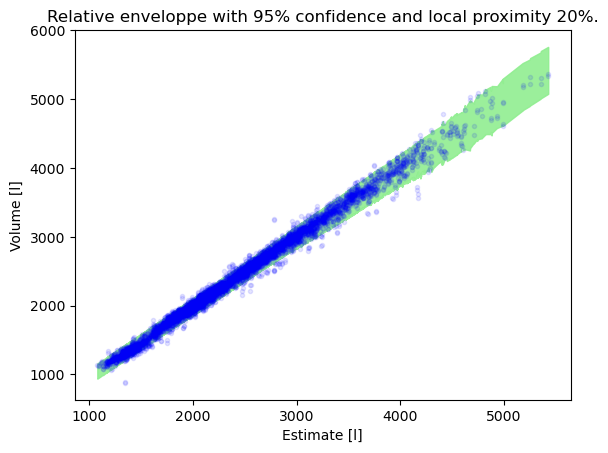

In [121]:
from utils import RelativeIqr

y = dffs["Volume [l]"].values
hy = dffs["Estimate [l]"].values
res = RelativeIqr(y,hy,p=20)
res.plot()

In [134]:
dffs.to_hdf(os.path.join(datadir,"out","Results.h5"),"volume_table")